<a href="https://colab.research.google.com/github/frarteaga93/Salud-Mental-en-tiempos-de-Pandemia/blob/main/Salud_mental_en_tiempos_de_pandemia_(GH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk 
nltk.download('punkt')
!pip install neattext
import neattext as nt 
import neattext.functions as nfx 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# New Section

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Prototype/Salud mental en tiempos de pandemia.csv")

In [ ]:
print(df)

         Semana  Ansiedad: (México)  Depresión: (México)  Estrés: (México)
0    31/07/2016                  30                   29                17
1    07/08/2016                  25                   33                19
2    14/08/2016                  26                   34                19
3    21/08/2016                  28                   36                25
4    28/08/2016                  32                   32                19
..          ...                 ...                  ...               ...
256  27/06/2021                  75                   55                32
257  04/07/2021                  69                   51                32
258  11/07/2021                  81                   52                34
259  18/07/2021                  79                   53                33
260  25/07/2021                  71                   55                34

[261 rows x 4 columns]


In [ ]:
#Renombramiento de columnas
df_renombrado=df.rename(columns={'Ansiedad: (México)': 'ansiedad', 'Depresión: (México)' : 'depresion', 'Estrés: (México)' : 'estres'})

In [ ]:
df_renombrado['Semana']=pd.to_datetime(df_renombrado['Semana'], format='%d/%m/%Y')

In [ ]:
#Creacion de columnas de Año y Mes
df_renombrado['year'] = df_renombrado['Semana'].dt.strftime('%Y')
df_renombrado['month'] = df_renombrado['Semana'].dt.strftime('%m')

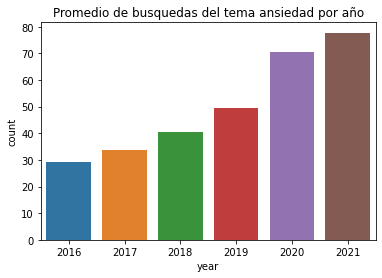

In [ ]:
#Grafico del promedio de busquedas del tema ansiedad
grafico_ansiedad=df_renombrado.groupby(['year'])['ansiedad'].mean()
ax = sns.barplot(x=grafico_ansiedad.index, y=grafico_ansiedad)
ax.set_title('Promedio de busquedas del tema ansiedad por año')
ax.set(ylabel='count');

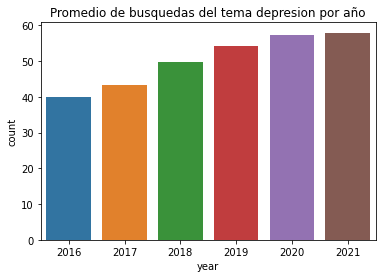

In [ ]:
grafico_depresion=df_renombrado.groupby(['year'])['depresion'].mean()
ax = sns.barplot(x=grafico_depresion.index, y=grafico_depresion)
ax.set_title('Promedio de busquedas del tema depresion por año')
ax.set(ylabel='count');

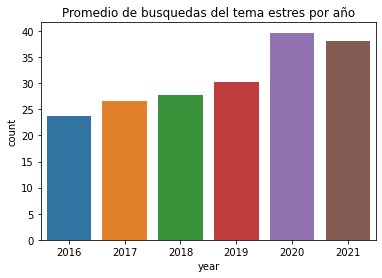

In [ ]:
grafico_estres=df_renombrado.groupby(['year'])['estres'].mean()
ax = sns.barplot(x=grafico_estres.index, y=grafico_estres)
ax.set_title('Promedio de busquedas del tema estres por año')
ax.set(ylabel='count');

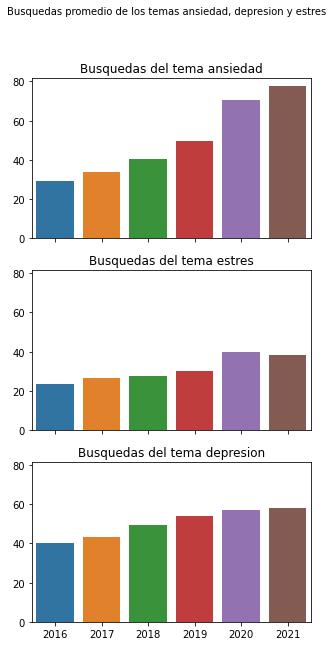

In [ ]:
fig, axes = plt.subplots(3, figsize=(5, 10), sharex=True, sharey=True)

sns.barplot(x=grafico_ansiedad.index, y=grafico_ansiedad, ax=axes[0])
sns.barplot(x=grafico_estres.index, y=grafico_estres, ax=axes[1])
sns.barplot(x=grafico_depresion.index, y=grafico_depresion, ax=axes[2])

axes[0].set(xlabel='', ylabel='', title='Busquedas del tema ansiedad')
axes[1].set(xlabel='', ylabel='', title='Busquedas del tema estres')
axes[2].set(xlabel='', ylabel='', title='Busquedas del tema depresion')

fig.suptitle('Busquedas promedio de los temas ansiedad, depresion y estres', fontsize=10);

In [ ]:
#Desviacion estandar
desviacion_estandar_ansiedad=df_renombrado['ansiedad'].std()
desviacion_estandar_estres=df_renombrado['estres'].std()
desviacion_estandar_depresion=df_renombrado['depresion'].std()
print('Desviacion estandar del tema ansiedad:', desviacion_estandar_ansiedad)
print('Desviacion estandar del tema estres:', desviacion_estandar_estres)
print('Desviacion estandar del tema depresion en la web:', desviacion_estandar_depresion)

Desviacion estandar del tema ansiedad: 17.749933894431976
Desviacion estandar del tema estres: 9.261124932386053
Desviacion estandar del tema depresion en la web: 10.023394385798781


In [ ]:
#Media del tema de busquedas del tema ansiedad
print('Media de busquedas del tema ansiedad', df_renombrado['ansiedad'].mean())
print('Media de busquedas del tema depresion', df_renombrado['depresion'].mean())
print('Media de busquedas del tema estres:', df_renombrado['estres'].mean())

Media de busquedas del tema ansiedad 50.1992337164751
Media de busquedas del tema depresion 50.9080459770115
Media de busquedas del tema estres: 31.24137931034483


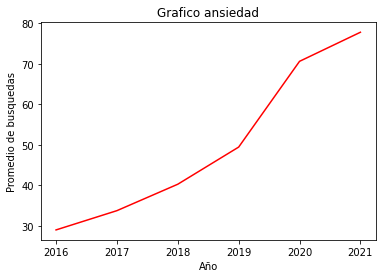

In [ ]:
plt.plot(grafico_ansiedad, color='red')
plt.title('Grafico ansiedad')
plt.xlabel('Año')
plt.savefig('Grafico ansiedad', dpi=600)
plt.ylabel('Promedio de busquedas');

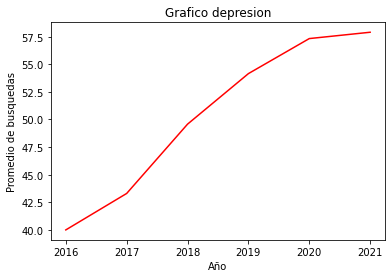

In [ ]:
plt.plot(grafico_depresion, color='red')
plt.title('Grafico depresion')
plt.xlabel('Año')
plt.savefig('Grafico depresion', dpi=600)
plt.ylabel('Promedio de busquedas');

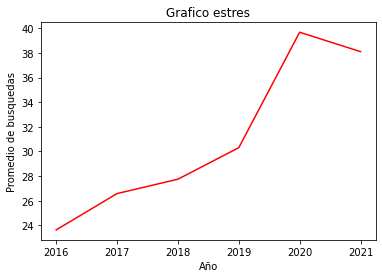

In [ ]:
plt.plot(grafico_estres, color='red')
plt.title('Grafico estres')
plt.xlabel('Año')
plt.savefig('Grafico estres', dpi=600)
plt.ylabel('Promedio de busquedas');

In [ ]:
df_2=pd.read_csv('/content/drive/MyDrive/Prototype/Suicide_detection.csv', encoding='latin1')

In [ ]:
df_2=df_2.astype(str)

In [ ]:
analisis_de_texto=''.join(df_2['text'].tolist())

In [ ]:
df_2.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I get affected by complents if its...,non_suicide
2,Finally 2020 is almost over... So I can never ...,non_suicide
3,i need helpjust help me crying so hard,suicide
4,"so lostHello, my name is Adam (16) and been ...",suicide


In [ ]:
analisis_de_texto=nt.TextFrame(analisis_de_texto)

In [ ]:
analisis_de_texto.describe()

Key      Value          
Length  : 153149872      
vowels  : 44167372       
consonants: 71926313       
stopwords: 16033745       
punctuations: 3934796        
special_char: 3983067        
tokens(whitespace): 29084507       
tokens(words): 29879946       


In [ ]:
analisis_de_texto.noise_scan()

{'noise_count': 19979429,
 'text_length': 153149872,
 'text_noise': 13.045671366933952}

In [ ]:
df_2['text']=df_2['text'].apply(nfx.remove_stopwords)
df_2['text']=df_2['text'].apply(nfx.remove_multiple_spaces)
df_2['text']=df_2['text'].apply(nfx.remove_puncts)
df_2['text']=df_2['text'].apply(nfx.remove_special_characters)
df_2['text']=df_2['text'].apply(nfx.remove_urls)
df_2['text']=df_2['text'].astype(str).str.lower()

In [ ]:
df_2['text'].apply(lambda x : nt.TextFrame(x).noise_scan())

0         {'text_noise': 0.8, 'text_length': 375, 'noise...
1         {'text_noise': 0, 'text_length': 69, 'noise_co...
2         {'text_noise': 2.898550724637681, 'text_length...
3         {'text_noise': 0, 'text_length': 30, 'noise_co...
4         {'text_noise': 0.6024096385542169, 'text_lengt...
                                ...                        
227631    {'text_noise': 1.2987012987012987, 'text_lengt...
227632    {'text_noise': 0, 'text_length': 74, 'noise_co...
227633    {'text_noise': 0, 'text_length': 77, 'noise_co...
227634    {'text_noise': 2.2415940224159403, 'text_lengt...
227635    {'text_noise': 0, 'text_length': 79, 'noise_co...
Name: text, Length: 227636, dtype: object

In [ ]:
print(df_2)

                                                     text        class
0       ex wife threatening suiciderecently left wife ...      suicide
1       weird affected complents coming know irl feel ...  non_suicide
2       finally 2020 over hear 2020 bad year again swe...  non_suicide
3                          need helpjust help crying hard      suicide
4       losthello adam 16 struggling years afraid past...      suicide
...                                                   ...          ...
227631  today went sledding friends like ot pretty big...  non_suicide
227632  like rock going httpsmusictastespacematchlavis...  non_suicide
227633  tell friends lonely deprd prebought little nig...  non_suicide
227634  usual stuff find posting sympathy pity know fa...      suicide
227635  havent beaten boss hollow knight fought tes di...  non_suicide

[227636 rows x 2 columns]


In [ ]:
suicide_class = df_2.loc[df_2["class"] == "suicide"]
non_suicide_class = df_2.loc[df_2["class"] == "non_suicide"]

In [ ]:
suicide_class=suicide_class['text']
non_suicide_class=non_suicide_class['text']

In [ ]:
words_s=','.join(suicide_class.tolist())
words_n=','.join(non_suicide_class.tolist())

In [ ]:
word_cloud_suicide=WordCloud(
width=1000,
height=1000,
max_words=100,
normalize_plurals=True,
repeat=False,
).generate_from_text(words_s)

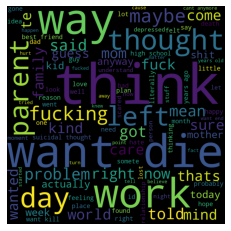

In [ ]:
plt.imshow(word_cloud_suicide)
plt.axis('off')
plt.savefig('Word Cloud Suicide', dpi=600)
plt.show()

In [ ]:
word_cloud_non_suicide=WordCloud(
width=3000,
height=3000,
max_words=100,
normalize_plurals=True,
collocations=False,
repeat=False).generate(words_n)

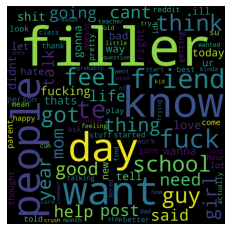

In [ ]:
plt.imshow(word_cloud_non_suicide)
plt.axis('off')
plt.savefig('Word Cloud Non Suicide', dpi=600)
plt.show()

In [ ]:
df_3=df_2.iloc[0:5000]

In [1]:
print(df_3)

NameError: ignored

In [ ]:
df_3['class'].value_counts()

non_suicide    2531
suicide        2469
Name: class, dtype: int64

In [ ]:
texto_completo=','.join(df_3['text'].tolist())

In [ ]:
tokenizer=nltk.word_tokenize(texto_completo)

In [ ]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_labels, test_labels = train_test_split(df_3["text"], 
                                                                   df_3["class"], 
                                                                   stratify=df_3["class"])

In [ ]:
vectores_palabras = CountVectorizer(input=tokenizer)

train_X = vectores_palabras.fit_transform(train_text)
test_X = vectores_palabras.transform(test_text)

train_X.shape

(3750, 17962)

In [ ]:
from sklearn.svm import LinearSVC
clasificador = LinearSVC()
clasificador.fit(train_X, train_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.metrics import accuracy_score

predicciones = clasificador.predict(test_X)

accuracy = accuracy_score(test_labels, predicciones)

print(accuracy)

0.8744


In [ ]:
mensaje_2= 'I want to die'
mensaje_1= 'I want to play videogames'
mensaje_3= 'I feel sad'
mensaje_4= 'I wish i could speak to someone about how i feel'
mensaje_5='i love watching movies' 

prueba = [mensaje_2,mensaje_1, mensaje_3, mensaje_4, mensaje_5]

prueba_X = vectores_palabras.transform(prueba)
prediccion = clasificador.predict(prueba_X)

In [ ]:
for text, label in zip(prueba, prediccion):
    print(f"{label:} - {text}")

suicide - I want to die
non_suicide - I want to play videogames
non_suicide - I feel sad
suicide - I wish i could speak to someone about how i feel
non_suicide - i love watching movies
